# 1) Data Source and Contents

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, auc, roc_auc_score
import re
import xgboost as xgb

In [0]:
census = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

# 2) Finding Optimal Value of a key Hyperparameter

In [0]:
#split the data into training and testing dataset
variables = ['age_bin', 'capital_gl_bin', 'education_bin', 'hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin']
x_train = census.loc[census['flag']=='train',variables]
y_train = census.loc[census['flag']=='train','y']
x_train = pd.get_dummies(x_train, columns=variables, drop_first=True)

x_test = census.loc[census['flag']=='test',variables]
y_test = census.loc[census['flag']=='test','y']
x_test = pd.get_dummies(x_test, columns=variables, drop_first=True)

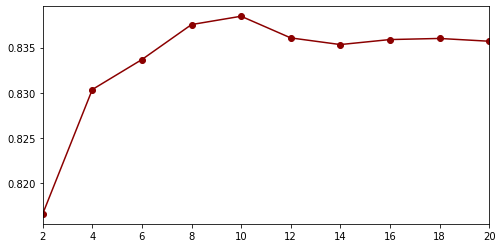

In [5]:
results = []
max_depth_options = [2,4,6,8,10,12,14,16,18,20]
for trees in max_depth_options:
  model = DecisionTreeClassifier(max_depth=trees, random_state=101)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

# 3) Building a Random Forest Model

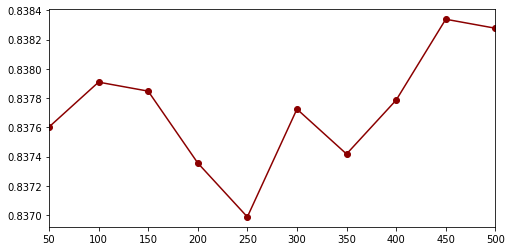

In [16]:
#plot a graph of Accuracy vs. n_estimator using Random Forest Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  rf_model = RandomForestClassifier(n_estimators=n, random_state=101)
  rf_model.fit(x_train,y_train)
  y_pred = rf_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker='o')

In [17]:
rf_accuracy = accuracy_score(y_test,y_pred)
print(rf_accuracy)
y_score=rf_model.predict_proba(x_test)[:,1]
rf_auc = roc_auc_score(y_test,y_score)
print(rf_auc)

0.8382777470671334
0.8808219381449162


# 4) Building AdaBoost, Gradient Boost, and XGB Model

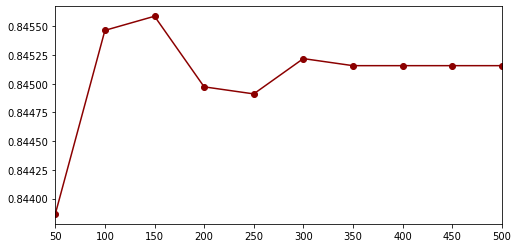

In [18]:
#plot a graph of Accuracy vs. n_estimator using AdaBoost Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  ada_model = AdaBoostClassifier(n_estimators=n, random_state=101)
  ada_model.fit(x_train,y_train)
  y_pred = ada_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker='o')

In [19]:
ada_accuracy = accuracy_score(y_test,y_pred)
print(ada_accuracy)
y_score=ada_model.predict_proba(x_test)[:,1]
ada_auc = roc_auc_score(y_test,y_score)
print(ada_auc)

0.8451569313924207
0.897430873511579


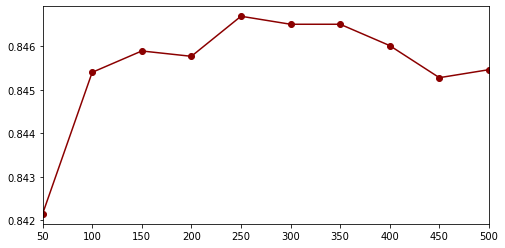

In [20]:
#plot a graph of Accuracy vs. n_estimator using Gradient Boost Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  grad_model = GradientBoostingClassifier(n_estimators=n, random_state=101)
  grad_model.fit(x_train,y_train)
  y_pred = grad_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker='o')

In [21]:
grad_accuracy = accuracy_score(y_test,y_pred)
print(grad_accuracy)
y_score=grad_model.predict_proba(x_test)[:,1]
grad_auc = roc_auc_score(y_test,y_score)
print(grad_auc)

0.8454640378355138
0.8984838999510926


In [0]:
#remove the[,] and <, xgb won't work otherwise
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

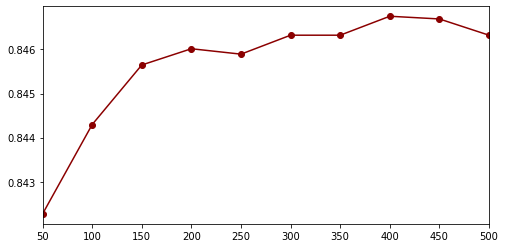

In [22]:
#plot a graph of Accuracy vs. n_estimator using XGB Model
results = []
n_estimator = [50,100,150,200,250,300,350,400,450,500]
for n in n_estimator:
  xgb_model = xgb.XGBClassifier(n_estimators=n, random_state=101)
  xgb_model.fit(x_train,y_train)
  y_pred = xgb_model.predict(x_test)
  accuracy = np.mean(y_test==y_pred)
  results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='darkred', marker='o')

In [23]:
xgb_accuracy = accuracy_score(y_test,y_pred)
print(xgb_accuracy)
y_score=xgb_model.predict_proba(x_test)[:,1]
xgb_auc = roc_auc_score(y_test,y_score)
print(xgb_auc)

0.8463239358761747
0.8985570625076711


# 5) Compare Performance

In [28]:
models = {'Random Forest':{'Accuracy':rf_accuracy,'AUC':rf_auc},'AdaBoost':{'Accuracy':ada_accuracy,'AUC':ada_auc},'Gradient Boost':{'Accuracy':grad_accuracy,'AUC':grad_auc},'XGB':{'Accuracy':xgb_accuracy,'AUC':xgb_auc}}
pctable = pd.DataFrame(models)
pctable

,Random Forest,AdaBoost,Gradient Boost,XGB
Accuracy,0.838278,0.845157,0.845464,0.846324
AUC,0.880822,0.897431,0.898484,0.898557
